# **Hand Gesture Recognition using CNN**
**A Machine Learning Project using the LeapGestRecog Dataset**


This project demonstrates how to recognize hand gestures using a Convolutional Neural Network (CNN). The dataset used is 'LeapGestRecog', which contains grayscale images of various hand gestures. The model is trained to classify gestures such as palm, fist, thumbs up, and others.

**SetUp & Upload Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

In [3]:
zip_path = '/content/drive/MyDrive/HandGestureDataset/leapGestRecog.zip'
extract_path = '/content/gesture_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
os.listdir("gesture_data")

['leapGestRecog']

**Importing Libraries**

In [5]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

**Data Preparation**

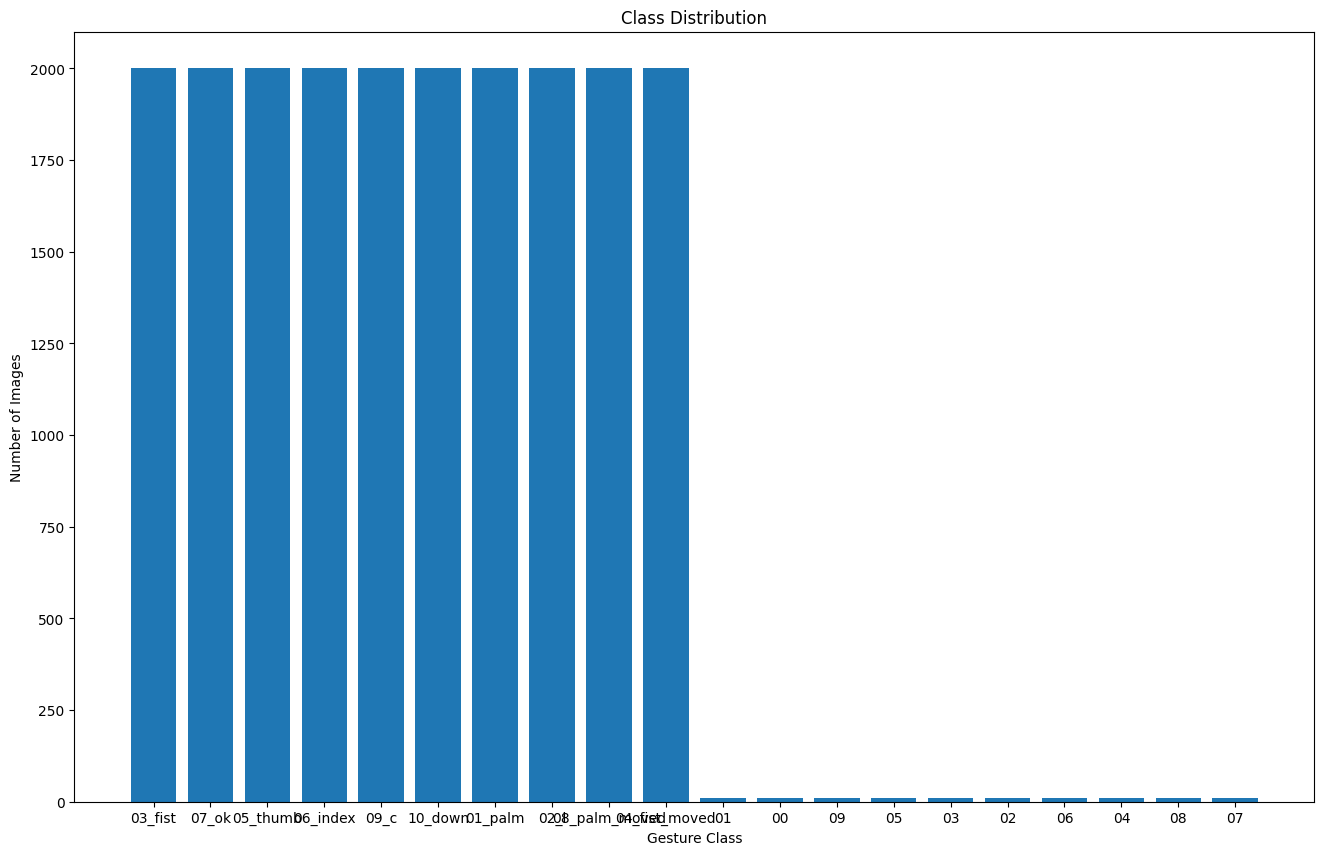

In [6]:
base_path = 'gesture_data/leapGestRecog'
class_counts = {}

for subject in os.listdir(base_path):
    subject_path = os.path.join(base_path, subject)
    if os.path.isdir(subject_path):
        for gesture_class in os.listdir(subject_path):
            gesture_path = os.path.join(subject_path, gesture_class)
            count = len(os.listdir(gesture_path))
            class_counts[gesture_class] = class_counts.get(gesture_class, 0) + count

plt.figure(figsize=(16,10))
plt.bar(class_counts.keys(), class_counts.values())
plt.title("Class Distribution")
plt.xlabel("Gesture Class")
plt.ylabel("Number of Images")
plt.show()

**Data Cleaning & Preprocessing**

In [7]:
data = []
labels = []

gesture_classes = sorted(os.listdir(os.path.join(base_path, '00')))

for subject in os.listdir(base_path):
    subject_path = os.path.join(base_path, subject)

    # Skip if not a directory (e.g., accidental files)
    if not os.path.isdir(subject_path):
        continue

    for gesture_class in gesture_classes:
        gesture_path = os.path.join(subject_path, gesture_class)
        if not os.path.exists(gesture_path):
            print(f"Skipped missing folder: {gesture_path}")
            continue

        for img_name in os.listdir(gesture_path):
            img_path = os.path.join(gesture_path, img_name)

            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (64, 64))
                img = img / 255.0  # Normalization
                data.append(img)
                labels.append(gesture_class)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

Skipped missing folder: gesture_data/leapGestRecog/leapGestRecog/01_palm
Skipped missing folder: gesture_data/leapGestRecog/leapGestRecog/02_l
Skipped missing folder: gesture_data/leapGestRecog/leapGestRecog/03_fist
Skipped missing folder: gesture_data/leapGestRecog/leapGestRecog/04_fist_moved
Skipped missing folder: gesture_data/leapGestRecog/leapGestRecog/05_thumb
Skipped missing folder: gesture_data/leapGestRecog/leapGestRecog/06_index
Skipped missing folder: gesture_data/leapGestRecog/leapGestRecog/07_ok
Skipped missing folder: gesture_data/leapGestRecog/leapGestRecog/08_palm_moved
Skipped missing folder: gesture_data/leapGestRecog/leapGestRecog/09_c
Skipped missing folder: gesture_data/leapGestRecog/leapGestRecog/10_down


In [8]:
X = np.array(data).reshape(-1, 64, 64, 1)
y = np.array(labels)
print(f"Total images loaded: {len(X)}")

Total images loaded: 20000


**Label Encoding**

In [9]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

**Train Test Split**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

**BUILD CNN MODEL**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(gesture_classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

**TRAIN THE MODEL**

In [13]:
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop])

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 94s 183ms/step - accuracy: 0.7283 - loss: 0.8024 - val_accuracy: 0.9952 - val_loss: 0.0146
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 94s 189ms/step - accuracy: 0.9916 - loss: 0.0313 - val_accuracy: 0.9967 - val_loss: 0.0095
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 100s 200ms/step - accuracy: 0.9923 - loss: 0.0223 - val_accuracy: 0.9987 - val_loss: 0.0022
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 133s 183ms/step - accuracy: 0.9968 - loss: 0.0104 - val_accuracy: 0.9998 - val_loss: 0.0011
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 183ms/step - accuracy: 0.9973 - loss: 0.0116 - val_accuracy: 0.9990 - val_loss: 0.0027
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 95s 190ms/step - accuracy: 0.9976 - loss: 0.0069 - val_accuracy: 0.9992 - val_loss: 0.0010
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 141s 187ms/step - accuracy: 0.9977 - loss: 0.0068 - val_accuracy: 0.9998 - val_loss: 6.9336e-04
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 140s 183ms/step - accuracy: 0.9986 

**EVALUATE AND VISUALIZE**

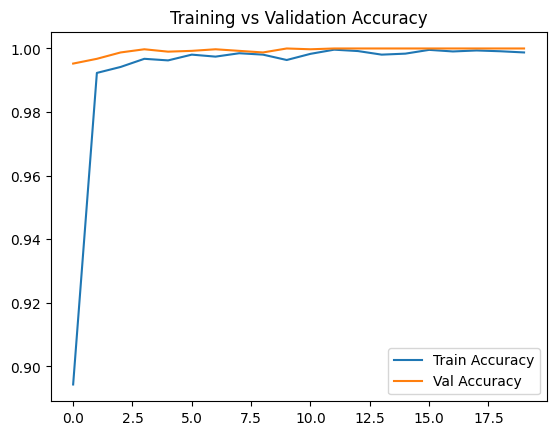

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

In [15]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Model Accuracy: {acc * 100:.2f}%")

125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 1.0000 - loss: 3.6626e-06
Model Accuracy: 100.00%


**Make Predictions**

In [16]:
import random

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


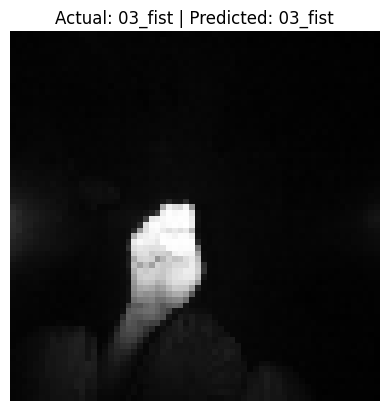

In [17]:
idx = random.randint(0, len(X_test) - 1)
sample_image = X_test[idx]

prediction = model.predict(np.expand_dims(sample_image, axis=0))
predicted_class = le.inverse_transform([np.argmax(prediction)])
actual_class = le.inverse_transform([np.argmax(y_test[idx])])

plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"Actual: {actual_class[0]} | Predicted: {predicted_class[0]}")
plt.axis('off')
plt.show()